### Este notebook é a segunda parte do meu projeto final. A primeira parte pode ser encontrada [aqui](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/notebooks/Projeto%20Final%20I%20(Docking)%20-%20Artur%20C..ipynb).

# ============================================================

# 1. Simulação com THC fora do sitio ativo

### Para realização desta simulação, o programa GROMACS foi utilizado. Ele foi selecionado por ser de livre acesso, e ter sido utilizado durante o curso.
### [Este tutorial](http://www.mdtutorials.com/gmx/complex/01_pdb2gmx.html), do Lemkul Lab, foi seguido.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1.1 Montando o Sistema

### O campo de força utilizado foi o CHARMM36 FF, baixado diretamente do [site do lab do MacKerell](http://mackerell.umaryland.edu/charmm_ff.shtml#gromacs).

### O modelo de água utilizado foi o TIP3P, presente no GROMACS.

### Para criação da topologia do ligante, o webserver [CHARMM General Force Field (CGENFF)](https://cgenff.umaryland.edu/) foi utilizado. Segue abaixo os valores de penalidades presentes na topologia utilizada.

In [6]:
! cat /home/artur/Documents/JupyterNotebooks/pDynamo/projeto_final/simul_biomol/controle\ negativo/thc.str

* Toppar stream file generated by
* CHARMM General Force Field (CGenFF) program version 2.5
* For use with CGenFF version 4.6
*

read rtf card append
* Topologies generated by
* CHARMM General Force Field (CGenFF) program version 2.5
*
36 1

! "penalty" is the highest penalty score of the associated parameters.
! Penalties lower than 10 indicate the analogy is fair; penalties between 10
! and 50 mean some basic validation is recommended; penalties higher than
! 50 indicate poor analogy and mandate extensive validation/optimization.

RESI THC            0.000 ! param penalty=  62.600 ; charge penalty=  23.384
GROUP            ! CHARGE   CH_PENALTY
ATOM O1     OG3R60 -0.356 !   21.576
ATOM O2     OG311  -0.531 !    0.000
ATOM C1     CG311  -0.093 !    9.407
ATOM C2     CG311   0.115 !   20.233
ATOM C3     CG301   0.209 !   23.384
ATOM C4     CG321  -0.219 !    6.019
ATOM C5     CG2R61 -0.006 !   21.059
ATOM C6     CG321  -0.172 !    0.262
ATOM C7     CG2D1  -0.216 !   16.289
ATOM C8     

### Podemos observar que, de maneira geral, a maioria das penalidade apresentou-se abaixo de 10. Poucas estão entre 10 e 50, e somente alguns diedrais estão acima de 50.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1.2 Minimização de Energia

### Para minimização de energia, o método de Steepest Descent foi utilizado.

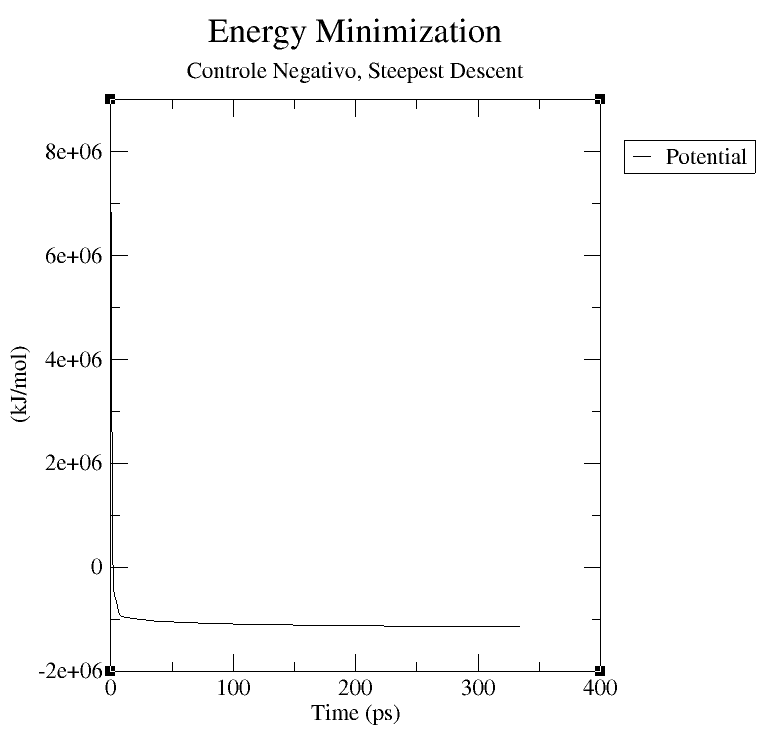

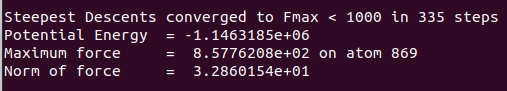

### Pelo gráfico, podemos observar que a energia foi minizada, e atingiu um platô. 

### Também podemos avaliar que a energia potencial está próxima de 10⁶, e a força está abaixo de 1000, indicando um bom resultado.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1.3 Equilibração NVT

### Para equilibração NVT, foram calculados 50.000 passos de 2 fs, gerando uma equilibração de 100 ps.

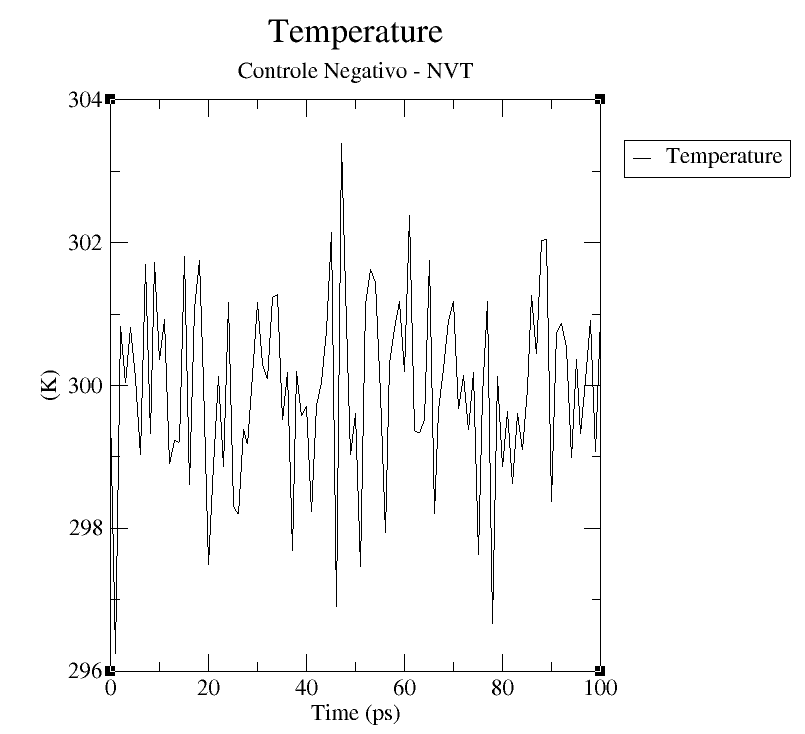

### Podemos ver que o sistema rapidamente atingiu a temperatura alvo de 300K e permaneceu estável.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1.4 Equilibração NPT

### Para equilibração NPT, foram calculados 50.000 passos de 2 fs, gerando uma equilibração de 100 ps.

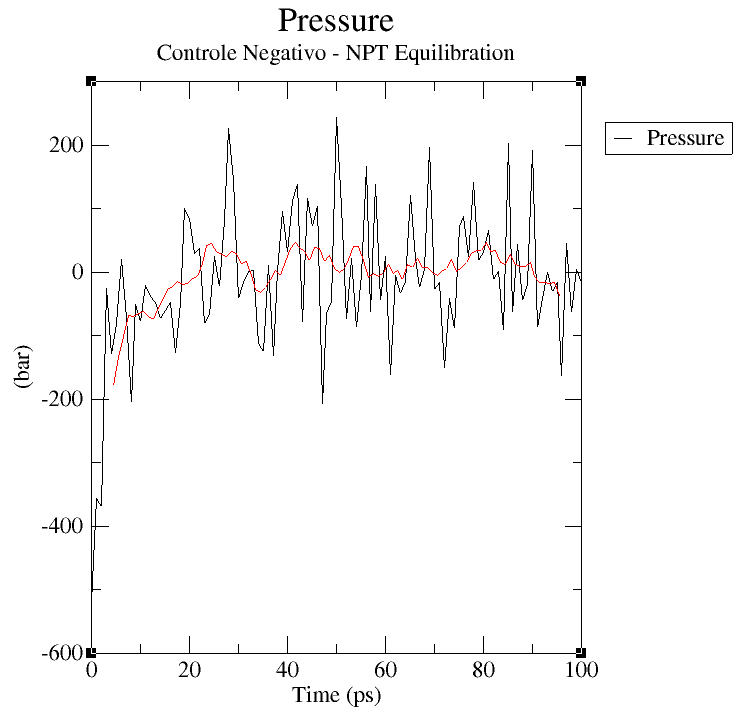

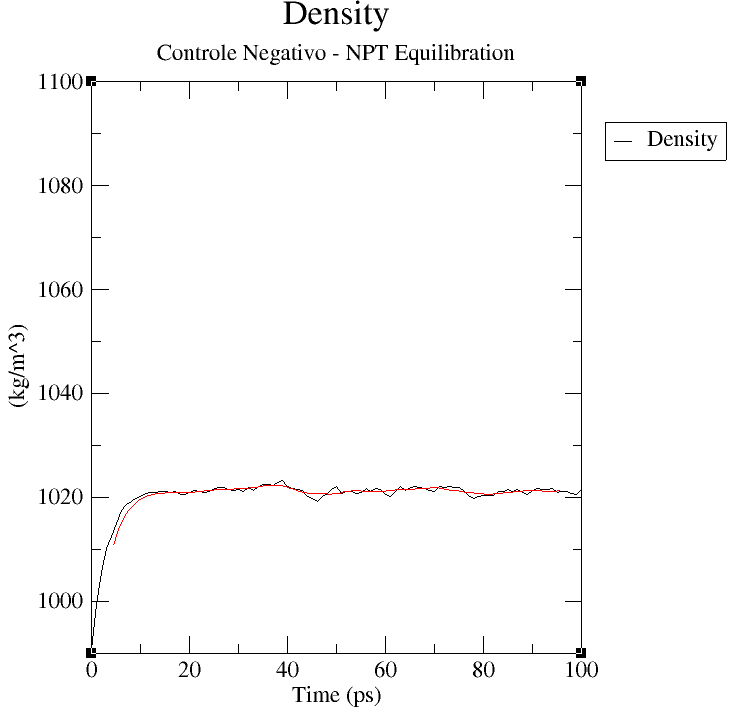

### Podemos ver a pressão varia bastante, mas isso é esperado. Em vermelho, vemos a média movel, que permaneceu mais estável, próximo do alvo de 1 bar.

### Os valores de densidade se mostraram estáveis, e próximos de 1000 kg/m³, que é a densidade da água.


### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1.5 Dinâmica Molecular

### Para a dinâmica molecular, 5.000.000 de passos de 2 fs foram calculados, gerando 10 ns de simulação.

![controle_neg.gif](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/data/neg.gif?raw=true)

### Caso o gif n carregue, [clique aqui](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/data/neg.gif)

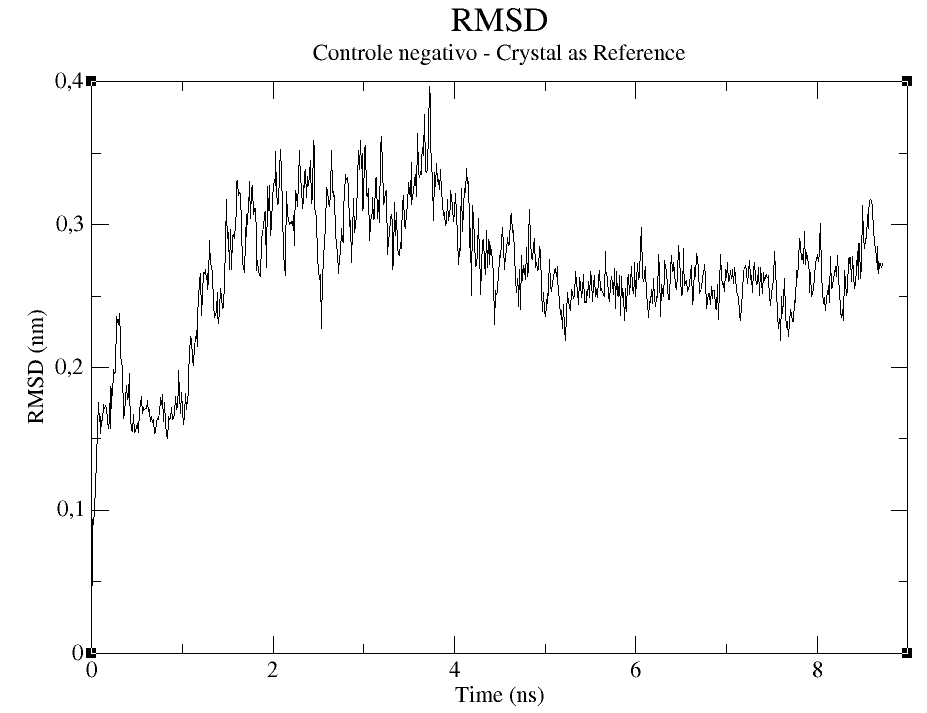

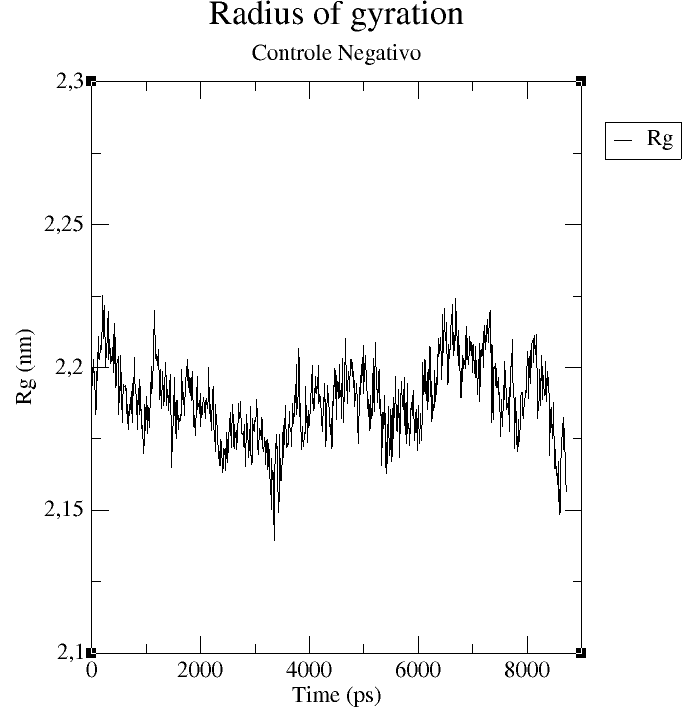

### Podemos observar que tanto o RMSD quando o raio de giração (Rg) variaram pouco.

### O RMSD variou um pouco mais, passando de aproximadamente 0,16 a 0,3 e estabilizando próximo de 0,25, enquanto o Rg manteve-se próximo de 2,2. Isso indica uma boa estabilidade da estrutura.

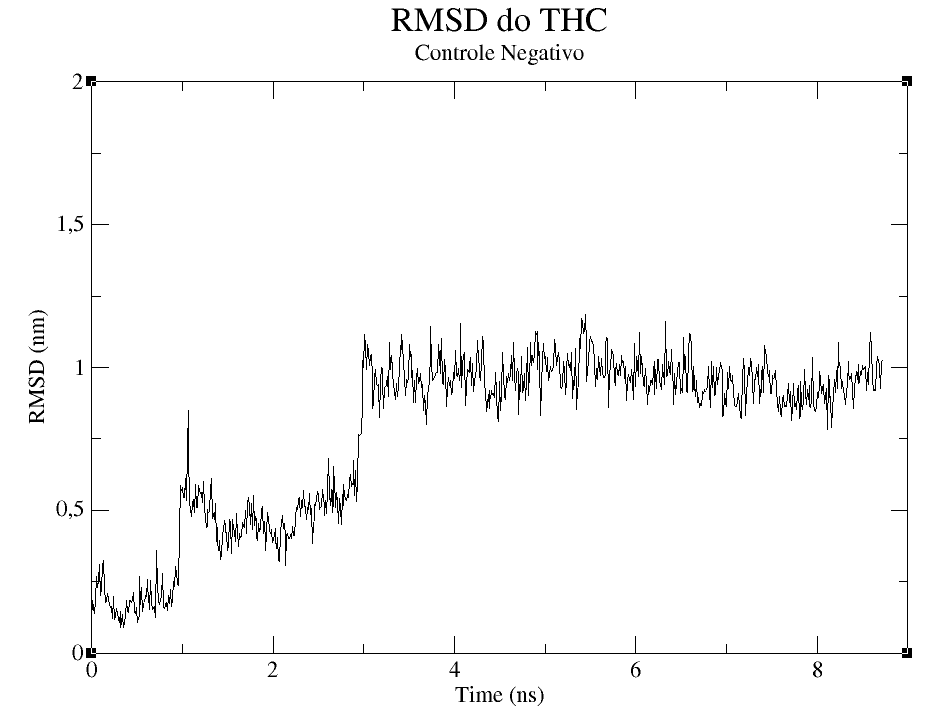

### Ao avaliarmos o THC sozinho, vemos que o RMSD estabilizou-se próximo de 1, em 3 ns. Este resultado mostra que a posição do ligante variou bastante ao longo da simulação, o que é esperado, posto que ele está localizado fora do sítio ativo. Com isso, validamos nosso modelo de dinâmica molecular.

### É importante citar que, para realmente validar o modelo, seria necessário realizar uma dinâmica de tempo maior, para avaliar com maior qualidade a variação do ligante, porém tal procedimento sai do escopo deste trabalho.

# ============================================================

# 2. Simulação com THC no sitio ativo

### Com a simulação do THC fora do sítio ativo, podemos validar o método utilizado. Assim, podemos simular a molécula de THC dentro do sítio ativo do receptor CB2.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.1 Montando o Sistema

### Para esta simulação, o mesmo tutorial foi seguido, utilizando-se o mesmo campo de força, e o mesmo web-server para criação da topologia do ligante. Segue abaixo as penalidades desta topologia:

In [5]:
! cat /home/artur/Documents/JupyterNotebooks/pDynamo/projeto_final/simul_biomol/sitio\ ativo/thc.str

* Toppar stream file generated by
* CHARMM General Force Field (CGenFF) program version 2.5
* For use with CGenFF version 4.6
*

read rtf card append
* Topologies generated by
* CHARMM General Force Field (CGenFF) program version 2.5
*
36 1

! "penalty" is the highest penalty score of the associated parameters.
! Penalties lower than 10 indicate the analogy is fair; penalties between 10
! and 50 mean some basic validation is recommended; penalties higher than
! 50 indicate poor analogy and mandate extensive validation/optimization.

RESI THC            0.000 ! param penalty=  62.600 ; charge penalty=  23.384
GROUP            ! CHARGE   CH_PENALTY
ATOM O1     OG3R60 -0.356 !   21.576
ATOM O2     OG311  -0.531 !    0.000
ATOM C1     CG311  -0.093 !    9.407
ATOM C2     CG311   0.115 !   20.233
ATOM C3     CG301   0.209 !   23.384
ATOM C4     CG321  -0.219 !    6.019
ATOM C5     CG2R61 -0.006 !   21.059
ATOM C6     CG321  -0.172 !    0.262
ATOM C7     CG2D1  -0.216 !   16.289
ATOM C8     

### Podemos observar que, de maneira geral, a maioria das penalidade apresentou-se abaixo de 10. Poucas estão entre 10 e 50, e somente alguns diedrais estão acima de 50.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.2 Minimização de Energia

### Para minimização de energia, o método de Steepest Descent foi utilizado.

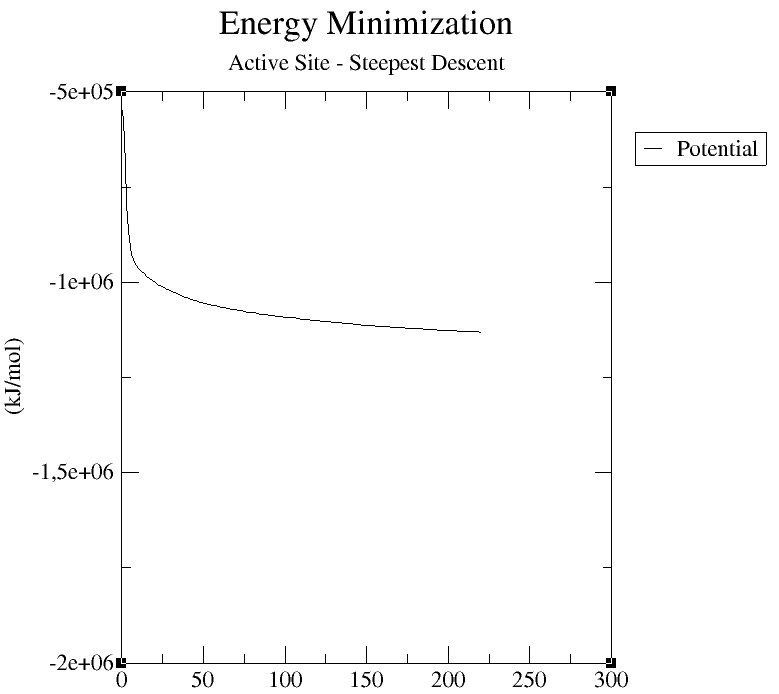

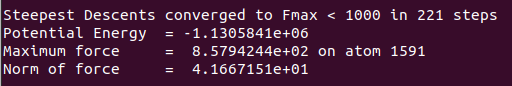

### Pelo gráfico, podemos observar que a energia foi minizada, e atingiu um platô. 

### Também podemos avaliar que a energia potencial está próxima de 10⁶, e a força está abaixo de 1000, indicando um bom resultado.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.3 Equilibração NVT 

### Para equilibração NVT, foram calculados 50.000 passos de 2 fs, gerando uma equilibração de 100 ps.

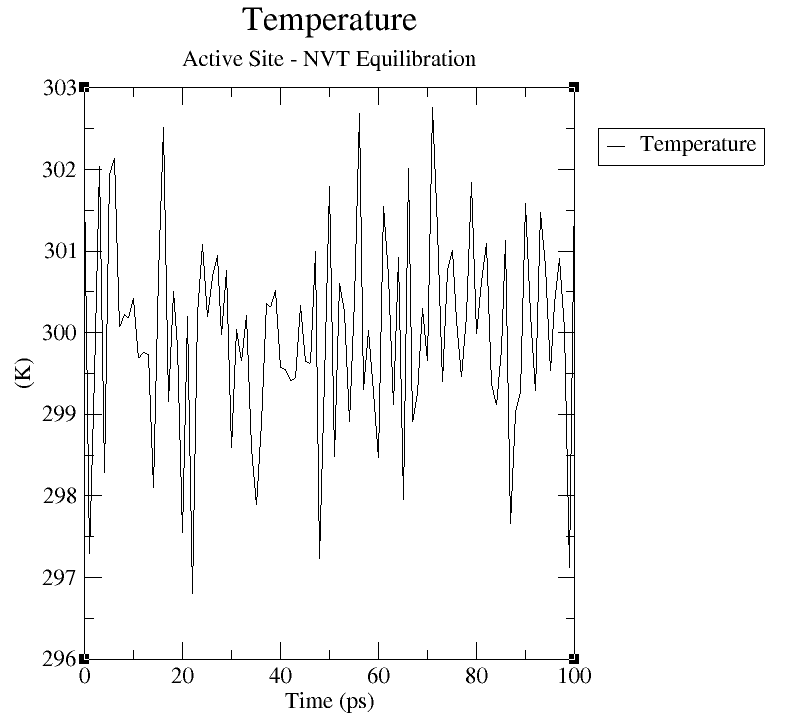

### Podemos ver que o sistema rapidamente atingiu a temperatura alvo de 300K e permaneceu estável.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.4 Equilibração NPT 

### Para equilibração NPT, foram calculados 50.000 passos de 2 fs, gerando uma equilibração de 100 ps.

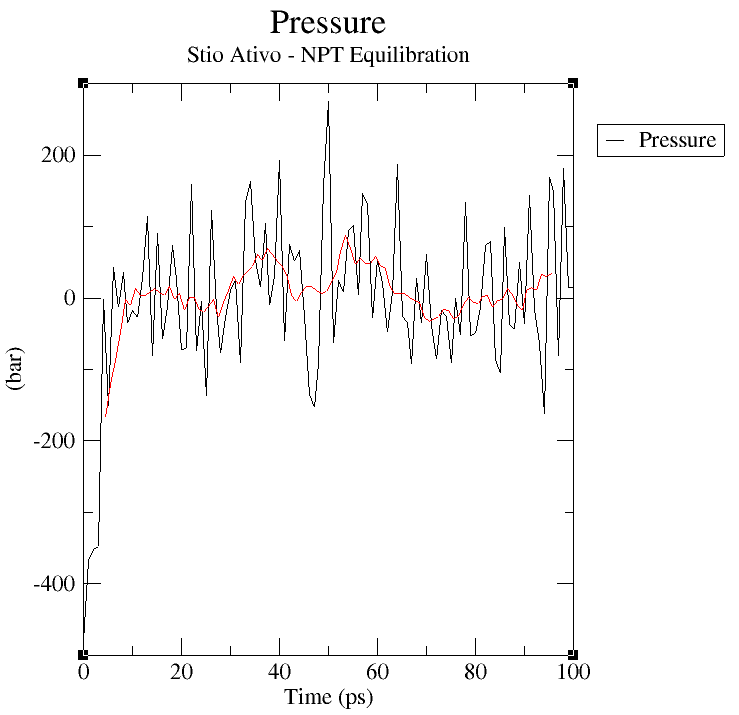

### Podemos ver a pressão varia bastante, mas isso é esperado. Em vermelho, vemos a média movel, que permaneceu mais estável, próximo do alvo de 1 bar.

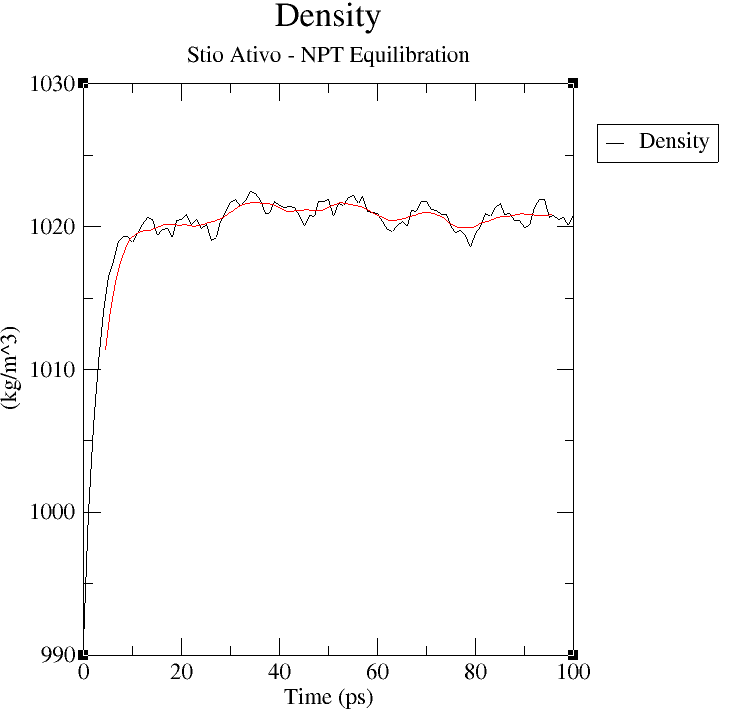

### Os valores de densidade se mostraram estáveis, e próximos de 1000 kg/m³, que é a densidade da água.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.5 Dinâmica Molecular

### Para a dinâmica molecular, 5.000.000 de passos de 2 fs foram calculados, geram 10 ns de simulação.

## 2.5.1 Análise de Estabilidade da Estrutura:

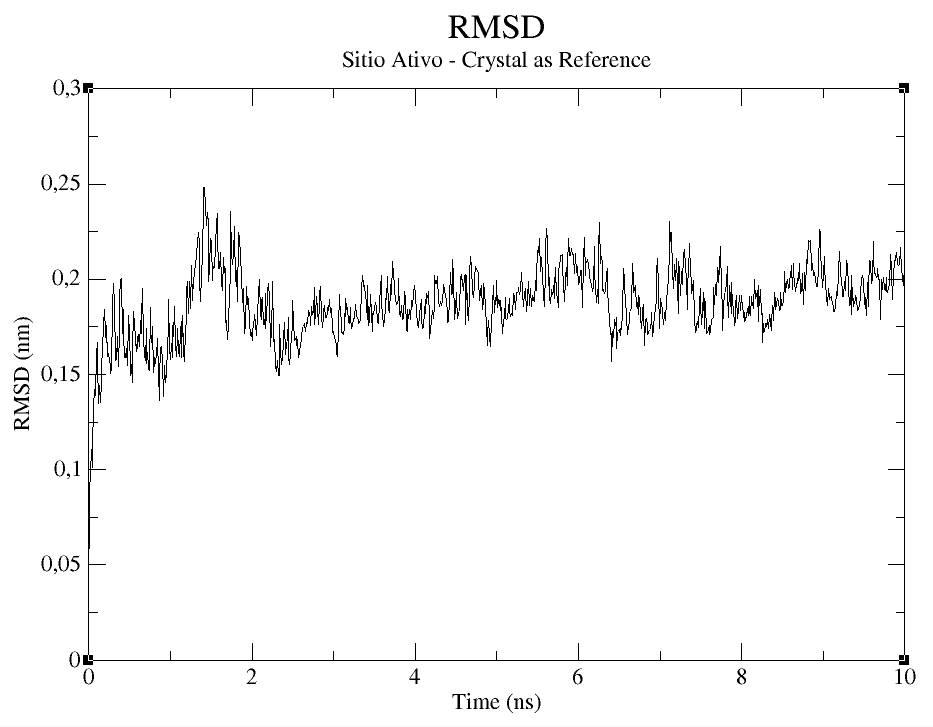

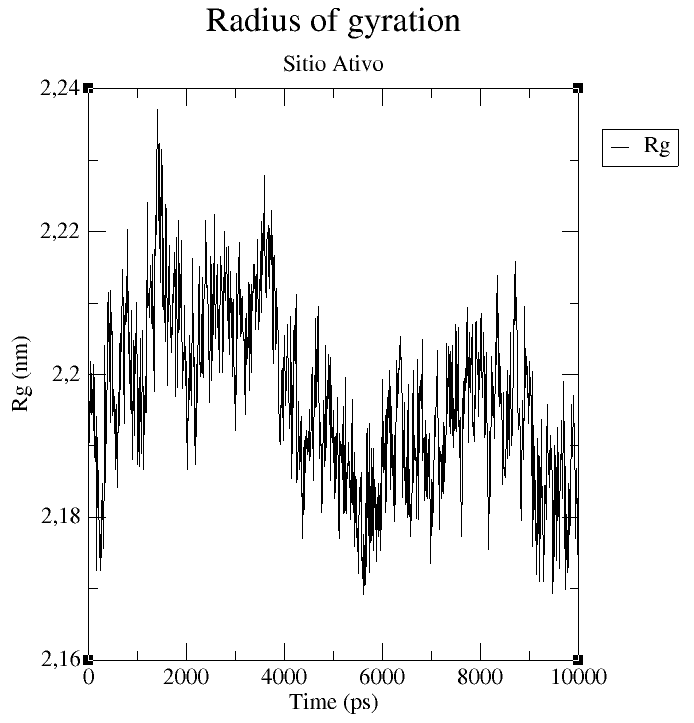

### Podemos observar que tanto o RMSD quando o raio de giração (Rg) variaram pouco.

### O RMSD estabilizou-se próximo de 0,2, e o Rg próximo de 2,2, mostrando que a estrutura é bastante estável.

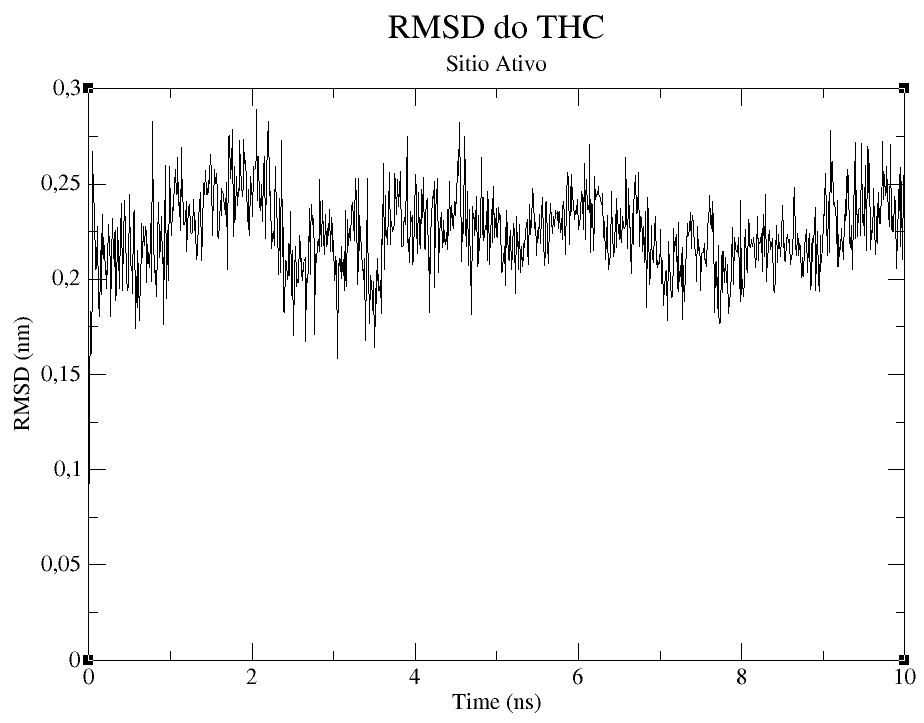

### Avaliando o THC sozinho, vemos que seu RMSD também apresentou-se próximo de 0,2, mostrando que ele apresenta-se estável no sítio ativo da proteína.

## 2.5.2 Análise das Interações Intermoleculares:

### Energia das Interações Coulombicas de curto alcance (kJ/mol):

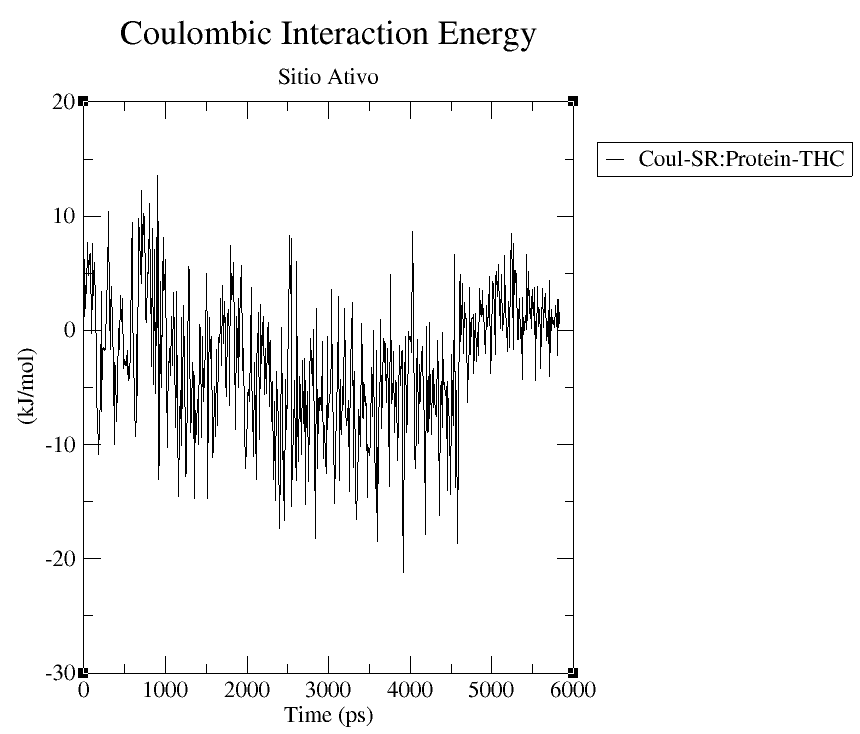

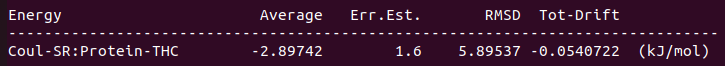

### Energia de Interações de Lennard-Jones de curto alcance (kJ/mol):

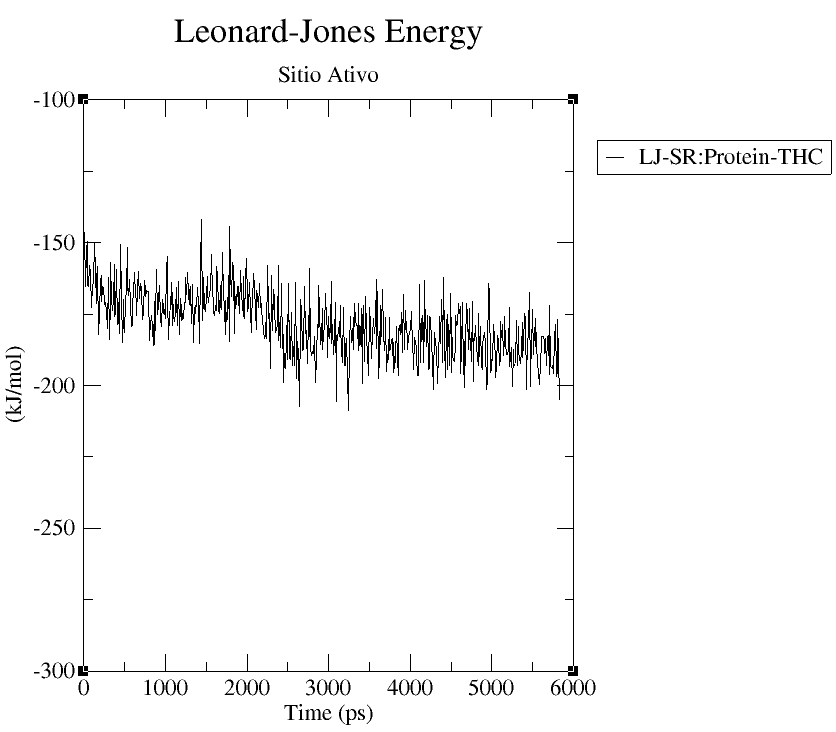

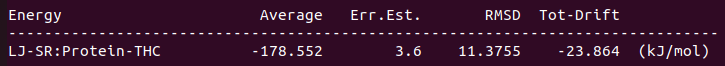

### Podemos ver que a contribuição da energia de Coloumb foi bastante baixa, posto que o THC é uma molécula neutra.

### Já a energia por interações de Leonnard Jones foi muito mais significativa.

## 2.5.3 Análise Visual da Dinâmica:

### Aqui, podemos observar a dinâmica completa:

![sitio_ativo_md.gif](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/data/sitio_ativo_md.gif?raw=true)

### Caso o gif n carregue, [clique aqui](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/data/sitio_ativo_md.gif)

### Visualmente, fica clara a estabilidade da proteína vista nos gráficos de RMSD e Rg. Tanto a proteína quanto a ligante permanecem bastante estáveis na simulação. Os loops desordenados parecem se movimentar um pouco mais, como esperado, mas ainda sim, permanecem estáveis.

## 2.5.4 Análise de interação entre o ligante e o sítio ativo

### O [artigo que cristalografou a proteína](https://www.cell.com/cell/fulltext/S0092-8674(20)30055-6?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867420300556%3Fshowall%3Dtrue) descreve uma ligação de H entre a hidroxila fenólica do THC e o resíduo Serina 285 do receptor canabinóide. Esta interação foi escolhida para ser analisada.

### Primeiramente, devemos analisar esta interação na proteína cristalografada. Como ela não contém átomos de H, eles foram adicionados utilizando o comando h_add, do pymol. Segue abaixo imagem mostrando essa interação:

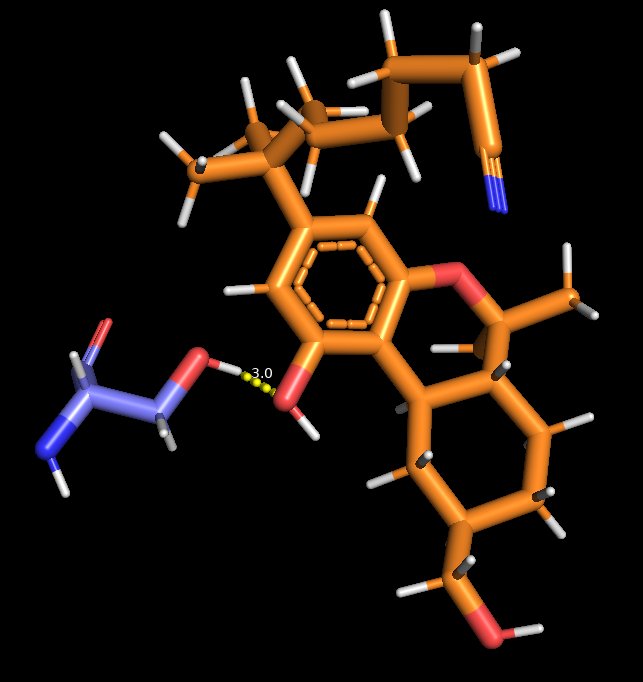

### No GROMACS, podemos calcular distância média entre esses dois átomos, ao longo da dinâmica:

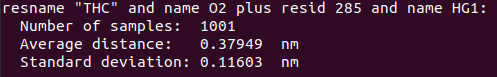

### Podemos observar uma distância de 3,8 ± 1,1 Å. Tipicamente, uma lidação de H é observada em distâncias abaixo de 3,5 Å. Como este valor está dentro do erro apresentado, este resultado mostrou-se inconclusivo.

### Abaixo, é possível observar a análise visual da interação entre este resíduo e o ligante (em azul temos a serina, e em laranja o THC).

![interaction.gif](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/data/interaction.gif?raw=true)

### Caso o gif n carregue, [clique aqui](https://github.com/arturcgs/masters/blob/main/simulacao_biomolecula/data/interaction.gif)

### Na análise visual, podemos observar que, por mais ou metade da dinâmica, o H da hidroxila da serina manteve-se, como esperado, próximo do O da hidroxila fenólica do THC, para formação de ligação de H. 

### Após a metade, porém, houve uma rotação do C da serina ligado à hidroxila, como pode ser visto melhor abaixo:

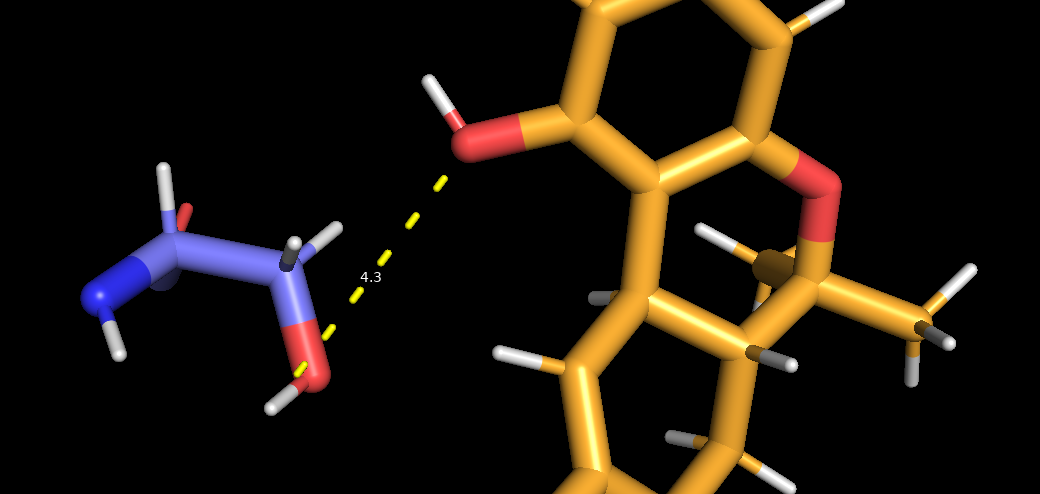

### Nesta conformação, o H da serina apresenta-se muito longe do O do THC para formação de ligação de H. Aqui, os átomos de H ligados ao C vizinho da hidroxila se aproximaram do O fenólico do THC:

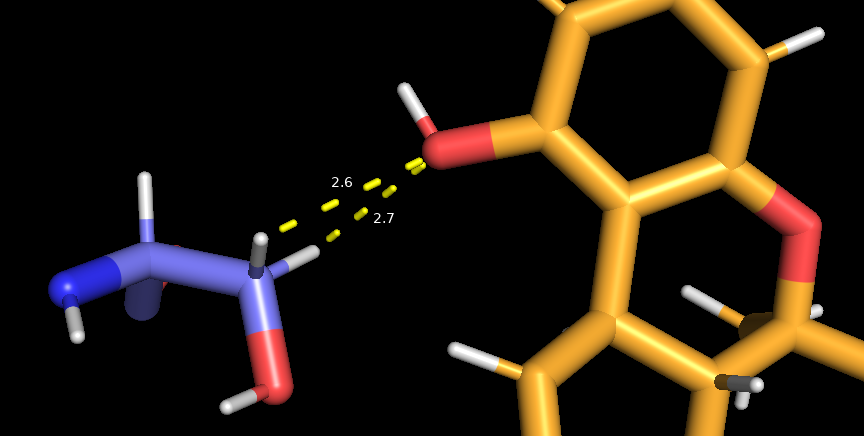

### Abaixo, podemos ver a distância média de um desses H para o O do THC.

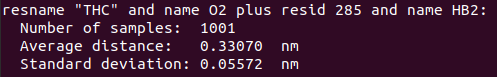

### Também é interessante notar que, nessa conformação, a serina é capaz de formar ligações de H internas, entre sua hidroxila e seu átomo de N, sendo possivelmente a interação que estabilizou essa conformação.

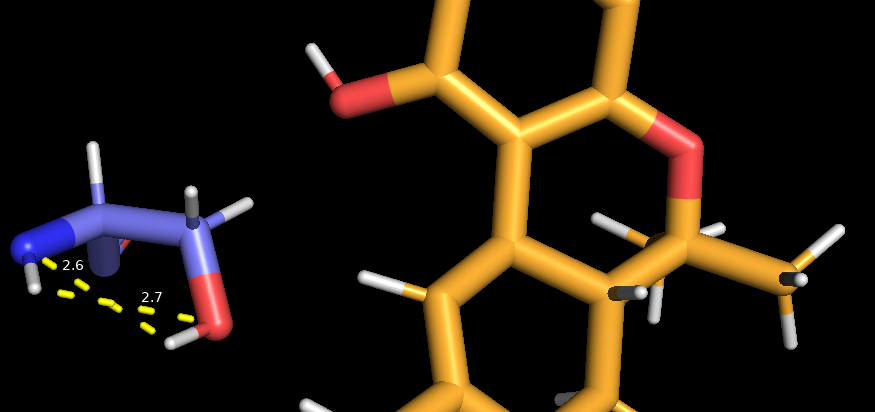

### Como podemos ver então, a ligação de H entre a hidroxilia fenólica do THC e a hidroxila do resíduo de Serina 285 do receptor não se mostrou bastante estável na dinâmica. 

### É importante ressaltar que essa dinâmica tem somente 10 ns, sendo necessário uma simulação maior para realização de análise mais robusta sobre essa interação. Com esses resultados, não é possível afirmar que essa ligação de H não ocorre na realidade, mas é possível lançar dúvida sobre sua importância.

# 3. Conslusão

### Neste projeto, foi realizado o processo de docking molecular da molécula de THC no receptor canabinóide, utilizando-se o web server DockThor. Este processo foi realizado no sítio ativo e em um ponto aleatório da proteína.

### Com isso, foram feitas duas dinâmicas moleculares de 10 ns, a partir dos dois resultados de docking. Primeiramente, com o THC fora do sítio ativo, foi observada uma grande variação na posição do ligante, como esperado.

### Para a dinâmica com o THC no sítio ativo, tanto a proteína quanto o THC demonstraram-se estáveis. Com esses resultados, foi possível analisar a interação de uma ligação de H formada por um hidroxila do THC e uma hidroxila do resíduo Serina 285 do receptor canabinóide. Essa análise, a pesar de inconclusiva, demonstrou que é necessário haver mais estudos sobre a relevância desta possível ligação de H.